<h1>Heart Failure - Data Cleansing</h1>

<h3>Attribute Information </h3>
<br>
- Age: age of the patient [years]
<br>
- Sex: sex of the patient [M: Male, F: Female]
<br>
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
<br>
- RestingBP: resting blood pressure [mm Hg]
<br>
- Cholesterol: serum cholesterol [mm/dl]
<br>
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
<br>
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
<br>                                               
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
<br>
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
<br>                                               
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
<br>
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
<br>
- HeartDisease: output class [1: heart disease, 0: Normal]

<h3>Import Dependencies</h3>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

%matplotlib inline

<h3>Load Dataset</h3>

In [4]:
dataset = pd.read_csv('heart_failure_dataset.csv')
dataset.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


<h3>Data Wrangling</h3>

In [9]:
#rename the columns
dataset.rename(columns={
    'Age':'age',
    'Sex':'gender',
    'ChestPainType':'chest_pain_type',
    'RestingBP':'resting_bp',
    'Cholesterol':'cholesterol',
    'FastingBS':'fasting_bs',
    'RestingECG':'resting_ecg',
    'MaxHR':'max_hr',
    'ExerciseAngina':'exercise_angina',
    'Oldpeak':'old_peak',
    'ST_Slope':'st_slope',
    'HeartDisease':'heart_disease'
}, inplace=True)

In [10]:
#check number of rows and columns
dataset.shape

(918, 12)

In [11]:
#check datatype
dict(dataset.dtypes)

{'age': dtype('int64'),
 'gender': dtype('O'),
 'chest_pain_type': dtype('O'),
 'resting_bp': dtype('int64'),
 'cholesterol': dtype('int64'),
 'fasting_bs': dtype('int64'),
 'resting_ecg': dtype('O'),
 'max_hr': dtype('int64'),
 'exercise_angina': dtype('O'),
 'old_peak': dtype('float64'),
 'st_slope': dtype('O'),
 'heart_disease': dtype('int64')}

In [12]:
#check null values
dataset.isnull().any()

age                False
gender             False
chest_pain_type    False
resting_bp         False
cholesterol        False
fasting_bs         False
resting_ecg        False
max_hr             False
exercise_angina    False
old_peak           False
st_slope           False
heart_disease      False
dtype: bool

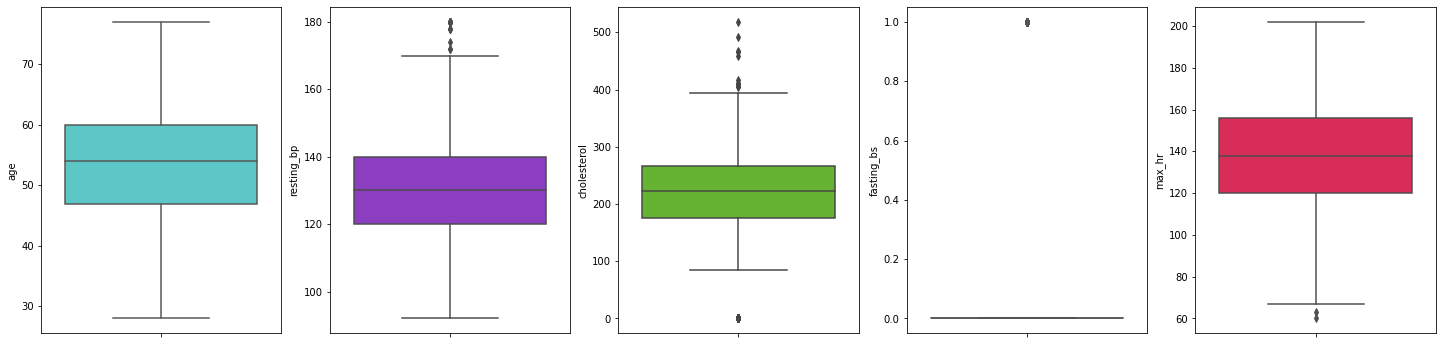

In [25]:
#check outlier
f, axes = plt.subplots(ncols=5, figsize=(25, 6))

sns.boxplot(y=dataset['age'], ax=axes[0], color='#4BD8D8')
sns.boxplot(y=dataset['resting_bp'], ax=axes[1], color='#9028D4')
sns.boxplot(y=dataset['cholesterol'], ax=axes[2], color='#62C81F')
sns.boxplot(y=dataset['fasting_bs'], ax=axes[3], color='#D7623D')
sns.boxplot(y=dataset['max_hr'], ax=axes[4], color='#F50F4B')
plt.show()

In [26]:
from scipy.stats import zscore

for i in range(1,5):
    #remove outliers
    dataset['resting_bp_outliers'] = zscore(dataset['resting_bp'])
    #define meter outliers
    dataset[(dataset.resting_bp_outliers > 3.0) | (dataset.resting_bp_outliers < -3.0) ]
    #drop outliers
    dataset = dataset.drop(dataset[(dataset.resting_bp_outliers > 3.0) | (dataset.resting_bp_outliers < -3.0) ].index)
    
for i in range(1,5):
    #remove outliers
    dataset['cholesterol_outliers'] = zscore(dataset['cholesterol'])
    #define meter outliers
    dataset[(dataset.cholesterol_outliers > 3.0) | (dataset.cholesterol_outliers < -3.0) ]
    #drop outliers
    dataset = dataset.drop(dataset[(dataset.cholesterol_outliers > 3.0) | (dataset.cholesterol_outliers < -3.0) ].index)

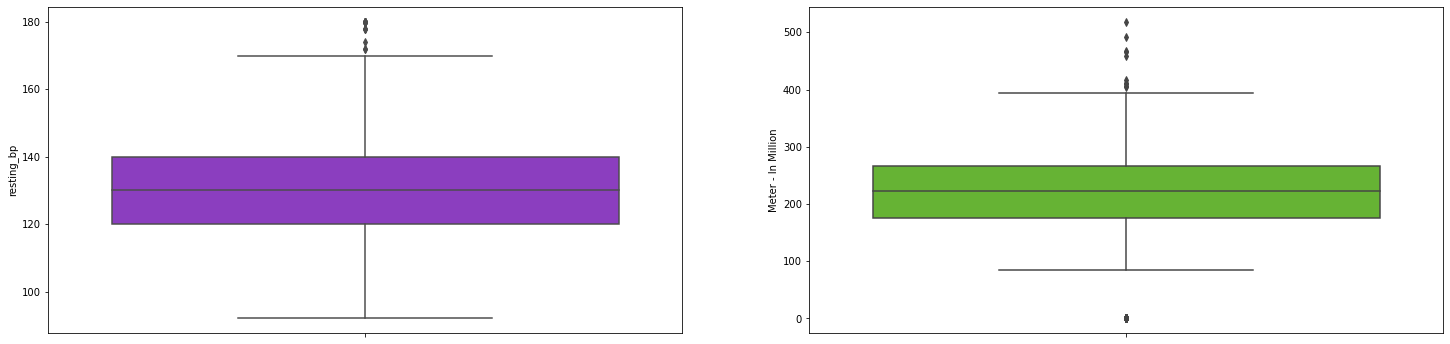

In [30]:
#check outlier
f, axes = plt.subplots(ncols=2, figsize=(25, 6))

sns.boxplot(y=dataset['resting_bp'], ax=axes[0], color='#9028D4')
sns.boxplot(y=dataset['cholesterol'], ax=axes[1], color='#62C81F')

plt.ylabel('Meter - In Million')
plt.show()

In [32]:
#drop the outliers columns
dataset.drop(['resting_bp_outliers','cholesterol_outliers'], axis=1, inplace=True)

In [36]:
dataset.head(2)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,old_peak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [38]:
#desribe all columns
dataset.describe(include='all')

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,old_peak,st_slope,heart_disease
count,905.000000,905,905,905.000000,905.000000,905.000000,905,905.000000,905,905.000000,905,905.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,715,488,NaN,NaN,NaN,544,NaN,541,NaN,453,NaN
mean,53.491713,NaN,NaN,132.088398,198.348066,0.232044,NaN,136.846409,NaN,0.883425,NaN,0.550276
std,9.431412,NaN,NaN,17.031040,106.967581,0.422370,NaN,25.391223,NaN,1.064767,NaN,0.497741
min,28.000000,NaN,NaN,92.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,175.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.500000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,266.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


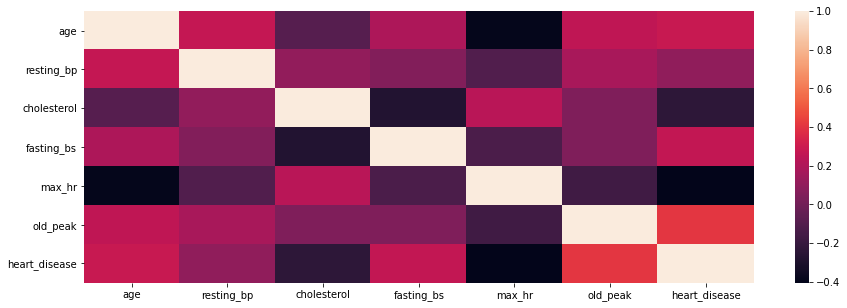

In [41]:
plt.figure(figsize=(15,5))
correlations = dataset.corr(method='pearson')
sns.heatmap(correlations,
           xticklabels=correlations.columns.values,
                      yticklabels=correlations.columns.values)
plt.show()

<h3>Data Analysis</h3>

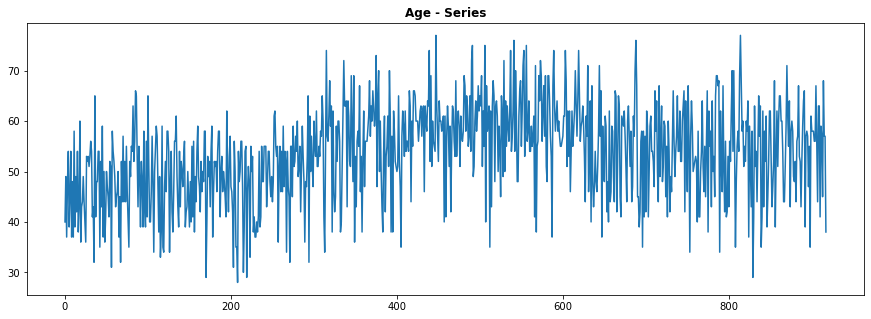

In [53]:
#age and heart failure
plt.figure(figsize=(15,5))
plt.plot(dataset.age)
plt.title('Age - Series', fontweight='bold')
plt.show()

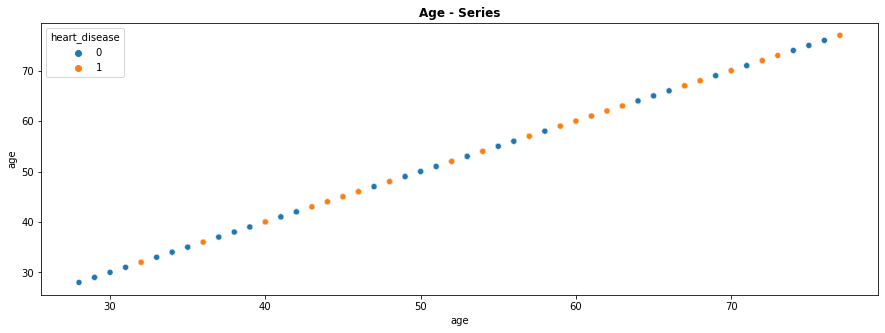

In [52]:
#age and heart failure
plt.figure(figsize=(15,5))
sns.scatterplot(x=dataset.age,y=dataset.age, hue=dataset.heart_disease, data=dataset)
plt.title('Age - Series', fontweight='bold')
plt.show()

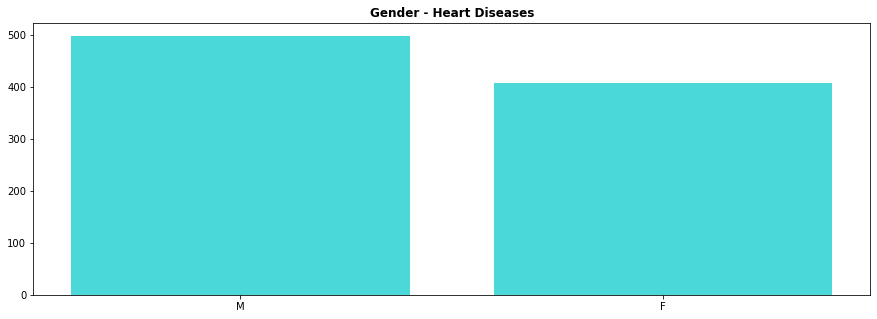

In [62]:
#gender and heart failure
plt.figure(figsize=(15,5))
plt.bar(dataset.gender.unique(),dataset.heart_disease.value_counts(), color='#4BD8D8')
plt.title('Gender - Heart Diseases', fontweight='bold')
plt.show()

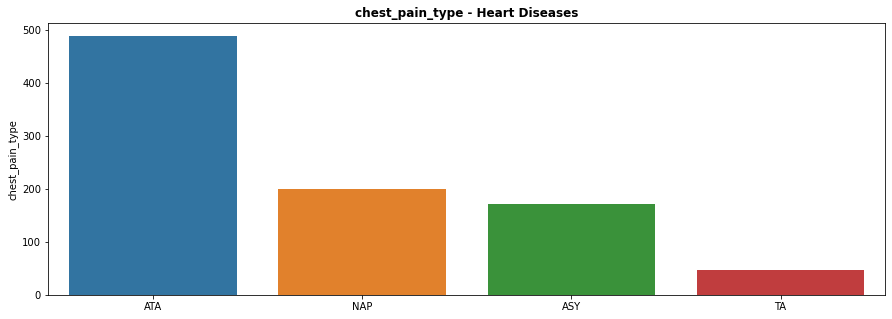

In [68]:
#chest_pain_type 
plt.figure(figsize=(15,5))
sns.barplot(x=dataset.chest_pain_type.unique(),y=dataset.chest_pain_type.value_counts(), data=dataset)
plt.title('chest_pain_type - Heart Diseases', fontweight='bold')
plt.show()

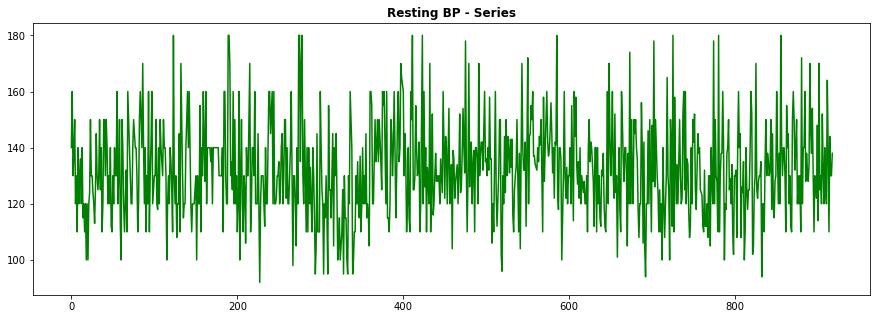

In [73]:
#age and heart failure
plt.figure(figsize=(15,5))
plt.plot(dataset.resting_bp, color='green')
plt.title('Resting BP - Series', fontweight='bold')
plt.show()

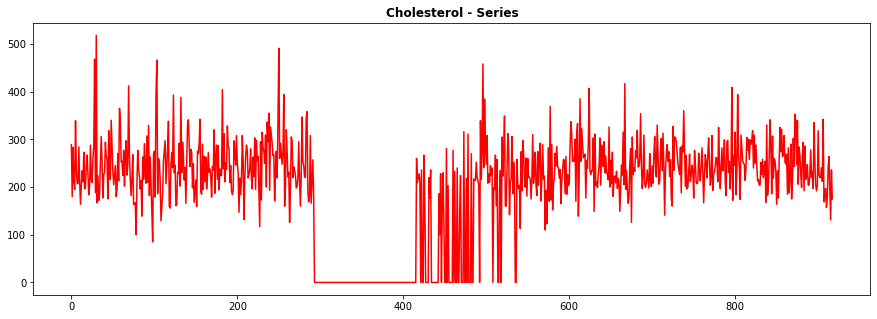

In [74]:
plt.figure(figsize=(15,5))
plt.plot(dataset.cholesterol, color='red')
plt.title('Cholesterol - Series', fontweight='bold')
plt.show()

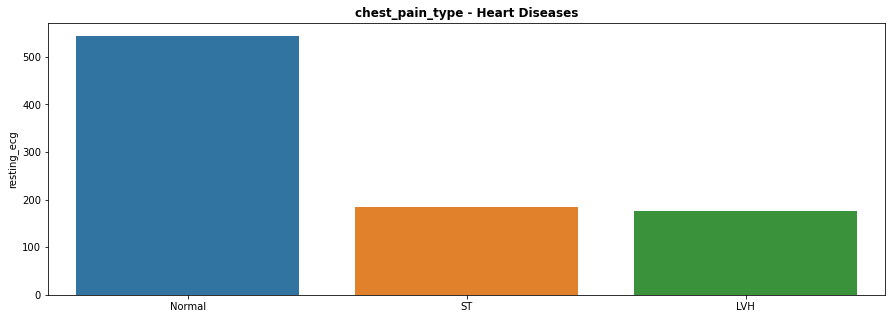

In [77]:
#resting_ecg
plt.figure(figsize=(15,5))
sns.barplot(x=dataset.resting_ecg.unique(),y=dataset.resting_ecg.value_counts(), data=dataset)
plt.title('chest_pain_type - Heart Diseases', fontweight='bold')
plt.show()

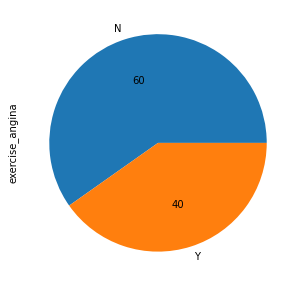

In [84]:
plt.figure(figsize=(15,5))
dataset.exercise_angina.value_counts().plot.pie(autopct='%2.f')
plt.show()

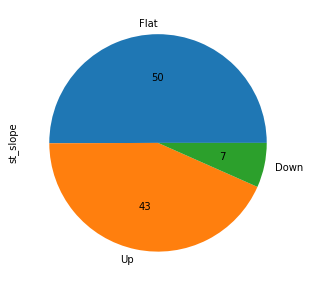

In [85]:
plt.figure(figsize=(15,5))
dataset.st_slope.value_counts().plot.pie(autopct='%2.f')
plt.show()

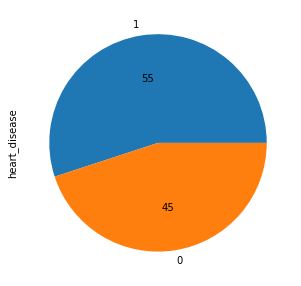

In [87]:
plt.figure(figsize=(20,5))
dataset.heart_disease.value_counts().plot.pie(autopct='%2.f')
plt.show()

<h3>Data Preprocessing</h3>

In [89]:
dataset.head(3)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,old_peak,st_slope,heart_disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [90]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in dataset.columns:
    if dataset[col].dtype=='object': 
        encode = LabelEncoder()
        encode.fit(list(dataset[col].values))
        dataset[col] = encode.transform(dataset[col].values)

In [92]:
dataset.head(3)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,exercise_angina,old_peak,st_slope,heart_disease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


In [93]:
#copy the dataset
data = dataset.copy()

In [95]:
#save the cleaned dataset
data.to_csv('heart_failure_cleaned_dataset.csv')